<a href="https://colab.research.google.com/github/MrAnish123/Differential-Equations-Project-1/blob/main/SetB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

LIBRARY IMPORTS

1. The Lotka-Volterra system non_linear nonautnomous first order
2. the v nullcines are when the predator population is constant (dx1/dt=0). the h nullclines are when the prey population is constant (dx2/dt=0)


Part A

/tmp/ipykernel_17028/3067731529.py:32: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


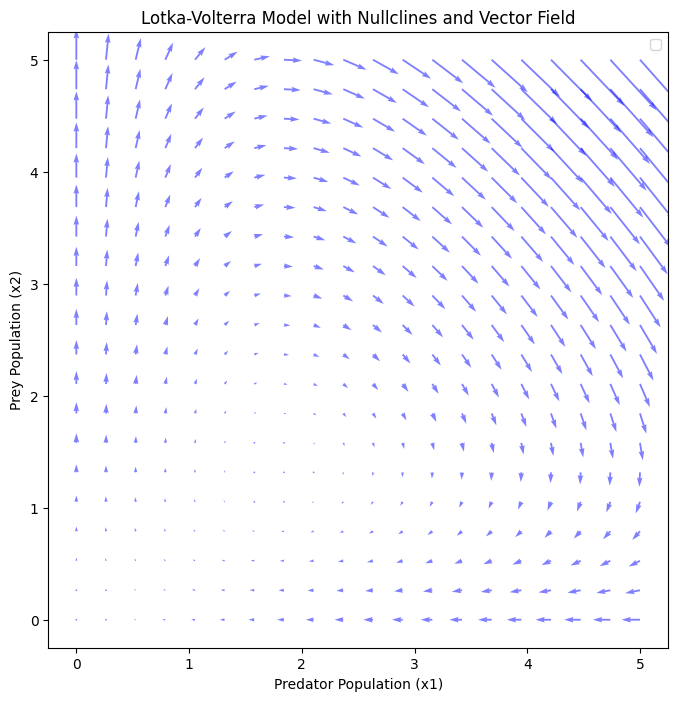

# Part B and C

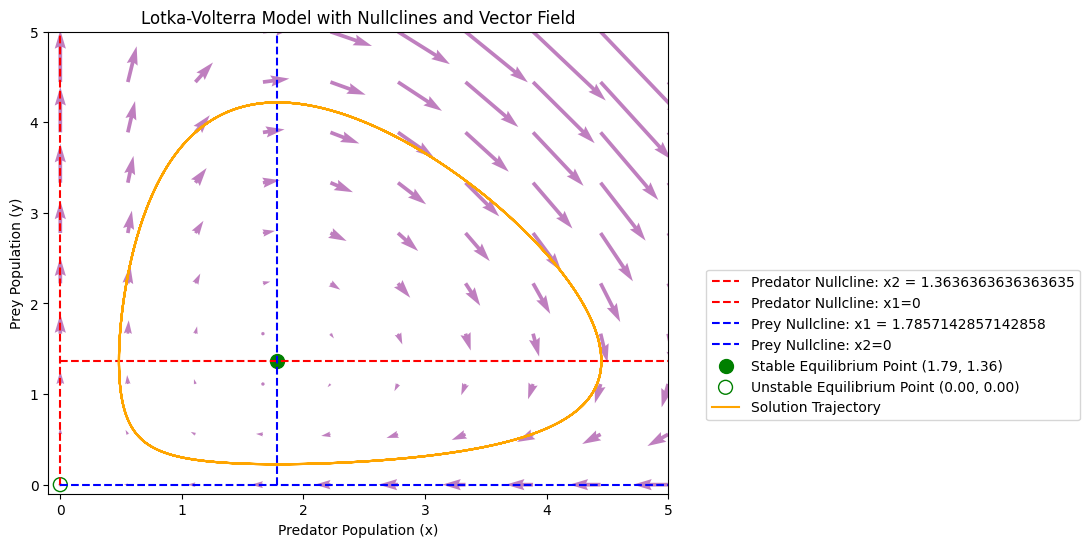

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

# Parameters for the Lotka-Volterra model
alpha = 1.5  # prey growth rate
beta = 1.1   # predator capture rate
delta = 1.4  # predator reproduction rate
gamma = 2.5  # predator death rate

# Define the Lotka-Volterra system
def lotka_volterra(X, t):
    x, y = X
    dxdt = -alpha * x + beta * x * y
    dydt = gamma * y - delta * x * y
    return [dxdt, dydt]

# Create a grid of points in phase space from 0 to 5
x_range = np.linspace(0, 5, 10)  # x: prey population (from 0 to 5)
y_range = np.linspace(0, 5, 10)  # y: predator population (from 0 to 5)
X, Y = np.meshgrid(x_range, y_range)

# Compute dxdt and dydt for each point on the grid
DX, DY = lotka_volterra([X, Y], 0)

# Plot the vector field
plt.figure(figsize=(8, 6))
plt.quiver(X, Y, DX, DY, color='purple', alpha=0.5)

# Plot the nullclines
# Predator nullcline: y = alpha / beta
y_nullcline = alpha / beta  # y = alpha / beta
y_nullcline1 = 0
plt.plot(x_range, np.ones_like(x_range) * y_nullcline, 'r--', label=f'Predator Nullcline: x2 = {alpha/beta}')
plt.plot(np.ones_like(y_range) * y_nullcline1, y_range, 'r--', label=f'Predator Nullcline: x1=0')

# prey nullcline: x = gamma / delta
x_nullcline = gamma / delta  # x = gamma / delta
x_nullcline1 = 0
plt.plot(np.ones_like(y_range) * x_nullcline, y_range, 'b--', label=f'Prey Nullcline: x1 = {gamma/delta}')
plt.plot(x_range, np.ones_like(x_range) * y_nullcline1, 'b--', label=f'Prey Nullcline: x2=0')

eq_x = gamma / delta  # x = gamma / delta
eq_y = alpha / beta   # y = alpha / beta
eq_x1 = 0
eq_y1 = 0
# Plot the equilibrium point (where x = gamma/delta and y = alpha/beta)
plt.scatter(eq_x, eq_y, color='green',s=100, label=f'Stable Equilibrium Point ({eq_x:.2f}, {eq_y:.2f})')
plt.scatter(eq_x1, eq_y1, color='green',facecolors = 'none',s=100, label=f'Unstable Equilibrium Point ({eq_x1:.2f}, {eq_y1:.2f})')

# Solve the system with initial conditions using odeint
initial_conditions = [0.5, 1.0]  # initial populations of predator and prey
time = np.linspace(0, 20, 2000)  # time range for the solution, h=20/0.01

# Solve the ODEs
solution = odeint(lotka_volterra, initial_conditions, time)

# Plot the solution trajectory
plt.plot(solution[:, 0], solution[:, 1], color='orange', label='Solution Trajectory')

# Labels and title
plt.xlabel('Predator Population (x)')
plt.ylabel('Prey Population (y)')
plt.title('Lotka-Volterra Model with Nullclines and Vector Field')
plt.xlim(-0.1, 5)  # Set x-axis range from 0 to 5
plt.ylim(-0.1, 5)  # Set y-axis range from 0 to 5
plt.legend(loc='upper left', bbox_to_anchor=(1.05, 0.5))
# Display the plot
plt.show()

The solution curve is behaving exactly what is should be when it comes to the trajectory of the curve, the graph clearly demonstrates how the vector field arrows are revolving around the stable equilibrium point (1.79, 1.36) and is repelled by the unstable equilibrium point (0, 0). The vector field determines the trajectory of the solution curve based on the initial condition and so we see our solution curve rotates toward stable equilibria and is repelled by the unstable just as our vector field is.

# Question 4 pointing on a x1(t) and x2(t) graph

<function matplotlib.pyplot.show(close=None, block=None)>

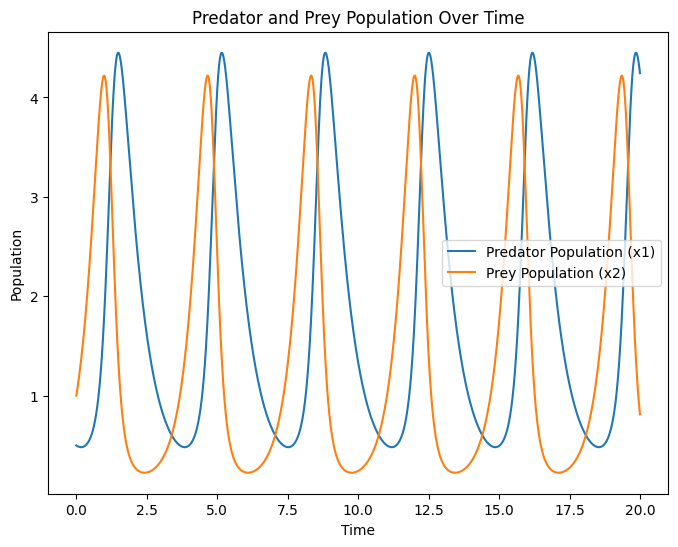

In [9]:
predator = solution[:,0]
prey= solution[:,1]
plt.figure(figsize=(8, 6))
plt.plot(time, predator, label='Predator Population (x1)')
plt.plot(time, prey, label='Prey Population (x2)')
plt.xlabel('Time')
plt.ylabel('Population')
plt.title('Predator and Prey Population Over Time')
plt.legend()
plt.show

Based on the graph above, we can conclude the curves are out of phase as they are not in since with one another. What this physically means is that the population for both prey and predator must depend on another to influence its population size over time. For instance the prey population will reach its maximum first before the predator population as when there are less predators, the prey population will grow as there are fewer predators to add pressure. But as more predators are born due to the increased population of the prey it will reach a point where the prey population will start to fall. As such there will be a slight lag where after the prey populations falls so to will the predator population as there is less prey for the predator population to consume     
